In [61]:
from experitur import Trial
from experitur.core.context import Context
import pandas as pd
import seaborn as sns
import numpy as np

In [62]:
ctx = Context("/tmp/pytest-of-mschroeder/pytest-525/test_pruning_2_0")

In [63]:
trials = ctx.trials.match()

In [64]:
def aggregate_logs_results(
    trials, additional_fields=None, ignore=None, drop_prefixes=None
):
    logs = []
    results = []
    for trial in trials:
        descr = trial.descr(
            trials, ignore=ignore, drop_prefixes=drop_prefixes, status=True
        )
        log = pd.DataFrame(trial.get_log())
        log["descr"] = descr
        log["trial_id"] = trial.id
        if additional_fields is not None:
            for n in additional_fields:
                log[n] = trial.get(n)

        logs.append(log)

        result = trial.result if trial.result is not None else {}
        results.append({**result, "descr": descr, "trial_id": trial.id})

    logs = pd.concat(logs).sort_values("descr")
    results = pd.DataFrame(results).sort_values("descr")

    return logs, results

In [65]:
logs, _ = aggregate_logs_results(trials)
logs

,gain,i,t,prune,descr,trial_id
2,0.000000,2,0.50,NaN,k=0.0,experiment/k-0.0
1,0.000000,1,0.25,no: own_max_step < min_steps,k=0.0,experiment/k-0.0
0,0.000000,0,0.00,no: own_max_step < min_steps,k=0.0,experiment/k-0.0
0,0.000000,0,0.00,no: own_max_step < min_steps,k=0.04999999999999993,experiment/k-0.04999999999999993
1,0.012422,1,0.25,no: own_max_step < min_steps,k=0.04999999999999993,experiment/k-0.04999999999999993
...,...,...,...,...,...,...
3,0.527633,3,0.75,no: surviving_trials < min_count,k=1.0,experiment/k-1.0
2,0.393469,2,0.50,no: surviving_trials < min_count,k=1.0,experiment/k-1.0
1,0.221199,1,0.25,no: own_max_step < min_steps,k=1.0,experiment/k-1.0
17,0.985736,17,4.25,no: surviving_trials < min_count,k=1.0,experiment/k-1.0


In [66]:
logs.groupby("descr")["i"].max()

descr
k=0.0                     2
k=0.04999999999999993     2
k=0.09999999999999998     2
k=0.1499999999999999      2
k=0.19999999999999996     2
k=0.25                    2
k=0.29999999999999993     2
k=0.35                    2
k=0.3999999999999999      2
k=0.44999999999999996     2
k=0.5                     2
k=0.55                    2
k=0.6                     2
k=0.6499999999999999      2
k=0.7                     2
k=0.75                    2
k=0.8                    19
k=0.85                   19
k=0.9                    19
k=0.95                   19
k=1.0                    19
Name: i, dtype: int64

In [67]:
logs[logs["descr"] == "k=0.7"].sort_values("i")

,gain,i,t,prune,descr,trial_id
0,0.000000,0,0.00,no: own_max_step < min_steps,k=0.7,experiment/k-0.7
1,0.160543,1,0.25,no: own_max_step < min_steps,k=0.7,experiment/k-0.7
2,0.295312,2,0.50,NaN,k=0.7,experiment/k-0.7


In [71]:
logs["prune"].unique()

array([nan, 'no: own_max_step < min_steps',
       'no: surviving_trials < min_count'], dtype=object)

<IPython.core.display.Javascript object>


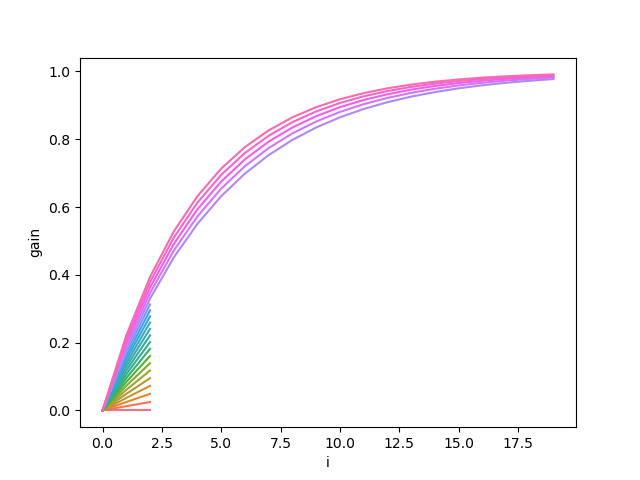

In [70]:
%matplotlib notebook

sns.lineplot(
        data=logs, x="i", y="gain", hue="descr", legend=False
    )

In [69]:
np.linspace(1.0, 0.0, 21)

array([1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55, 0.5 ,
       0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05, 0.  ])